<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/fifa/dim-reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction for high-dimensional data visualization

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** FIFA
  
Last update: August, 2025

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Load the data

In [5]:
fifa_df = pd.read_csv('./data/fifa_clean.csv')

C:\Users\jarat\AppData\Local\Temp\ipykernel_33752\1539798500.py:1: DtypeWarning: Columns (22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv('./data/fifa_clean.csv')


In [6]:
fifa_df.shape

(17981, 75)

In [7]:
fifa_df.dtypes

Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                  float64
Wage                   float64
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
Interceptions           object
Jumping                 object
Long passing            object
Long sho

In [8]:
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


### Filter the data

In [9]:
position_frecs = fifa_df['Preferred Position'].value_counts(dropna=False, normalize=True).cumsum()
position_frecs

Preferred Position
CB     0.183861
ST     0.320449
GK     0.433291
CM     0.519993
CDM    0.600133
LB     0.672821
CAM    0.743952
RM     0.809076
LM     0.871475
RB     0.930593
LW     0.955342
RW     0.979812
CF     0.987431
LWB    0.994327
RWB    1.000000
Name: proportion, dtype: float64

In [10]:
fifa_df = fifa_df.loc[fifa_df['Preferred Position'].isin(position_frecs.index[:10].tolist())]

In [11]:
fifa_df.shape

(16733, 75)

### Feature selection and data preparation

In [12]:
# Filtering the column list by index
player_attributes = fifa_df.columns[12:46]

In [13]:
player_attributes

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [14]:
# For features selected, making a transformation from string to int
# Why is this required? These features have values like '80+9' or '70-3'

attribute2int = lambda x: sum([int(i) for i in x.replace('-', '+').split('+')]) if type(x) == str else x

for attribute in player_attributes:
    print('Transforming', attribute)
    fifa_df[attribute] = fifa_df[attribute].apply(attribute2int)

Transforming Acceleration
Transforming Aggression
Transforming Agility
Transforming Balance
Transforming Ball control
Transforming Composure
Transforming Crossing
Transforming Curve
Transforming Dribbling
Transforming Finishing
Transforming Free kick accuracy
Transforming GK diving
Transforming GK handling
Transforming GK kicking
Transforming GK positioning
Transforming GK reflexes
Transforming Heading accuracy
Transforming Interceptions
Transforming Jumping
Transforming Long passing
Transforming Long shots
Transforming Marking
Transforming Penalties
Transforming Positioning
Transforming Reactions
Transforming Short passing
Transforming Shot power
Transforming Sliding tackle
Transforming Sprint speed
Transforming Stamina
Transforming Standing tackle
Transforming Strength
Transforming Vision
Transforming Volleys


### Build principal components

In [15]:
# Let's build a pipeline to automate the process of transforming features before applying PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=42))
])

In [16]:
# Generating the principal components
fifa_components = pipeline.fit_transform(fifa_df[player_attributes])

In [17]:
fifa_components.shape

(16733, 5)

In [18]:
fifa_components

array([[ 8.11526791, -4.0502987 ,  4.13074002,  0.83348   ,  3.26467892],
       [ 6.42223221, -3.65223654,  5.2350182 ,  0.0179264 ,  1.53657838],
       [-8.28222429, -1.78967206,  6.53861762, -2.49140435,  2.88436703],
       ...,
       [-2.99533421, -2.63770462, -2.86285295,  0.60939967,  0.1922329 ],
       [-2.16568114,  0.29854018, -2.61174085, -0.42167508, -1.38326734],
       [-5.46933438,  2.3249926 , -3.51328669,  1.71659768, -0.18110314]])

In [19]:
# What is the percentage of variance explained by each component
print(pipeline['pca'].explained_variance_ratio_)
print(pipeline['pca'].explained_variance_ratio_.sum())

[0.56098433 0.14179782 0.06838492 0.05080264 0.03959694]
0.8615666532120466


In [20]:
pipeline['pca'].components_.T.shape

(34, 5)

In [21]:
loadings = pipeline['pca'].components_.T
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pipeline['pca'].n_components_)], index=fifa_df[player_attributes].columns)

In [22]:
loadings_df

,PC1,PC2,PC3,PC4,PC5
Acceleration,0.161717,-0.116303,-0.211375,-0.215074,0.282275
Aggression,0.151058,0.246300,0.121502,0.044452,0.092587
Agility,0.163299,-0.161611,-0.102547,-0.284827,0.175675
Balance,0.143632,-0.133142,-0.198750,-0.351252,0.066237
Ball control,0.218405,-0.043840,0.034652,0.006161,-0.031398
Composure,0.178645,0.024592,0.238235,0.020615,0.059772
Crossing,0.198806,-0.041826,0.029590,-0.176035,-0.106129
Curve,0.194575,-0.123625,0.099887,-0.062059,-0.126537
Dribbling,0.211326,-0.111076,-0.025822,-0.035412,-0.027877
Finishing,0.176090,-0.228944,0.046190,0.186316,0.030280


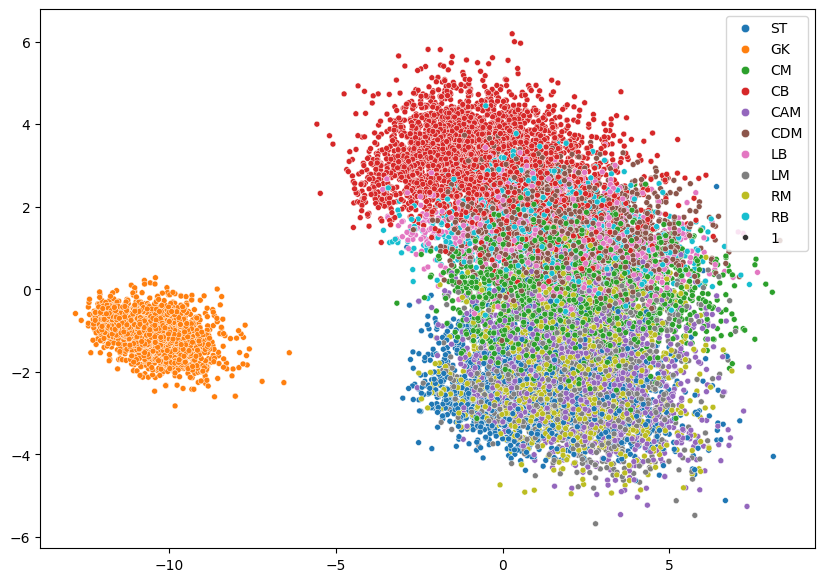

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=fifa_components[:,0], y=fifa_components[:,1], hue=fifa_df['Preferred Position'], size=1)
plt.legend(loc='upper right')
plt.show()